<h1 style="color:darkred;"> Bosques Aleatorios: ¿Ingreso Alto o Bajo? </h1>
<h2> Horas trabajadas, Años de Estudio, Edad, Tipo trabajo, ...</h2>


<h1 style="color:darkred;"> Aleatoriedad: </h1>
<h1 style="color:darkred;"> Muestreo con reemplazo </h1>
<h2 style="color:darkblue;"> >>>>> max_samples <<<<< </h2>

Se puede crear un bosque aleatorio usando 2/3 de los datos, esto permite tener más aleatoriedad en cada uno de los árboles

In [12]:
import pandas as pd

personas = pd.read_csv("ingresos.csv")

print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))



    edad  estudio  genero  tipo_trabajo  horas  ingreso
86    21        9       0             0     44        0
46    44       10       0             0     32        0
75    50        9       1             1     40        0
86    21        9       0             0     44        0
54    53        1       1             0     40        0
..   ...      ...     ...           ...    ...      ...
20    58        4       1             1     40        0
55    30       10       0             0     40        0
61    43       10       0             0     35        0
1     30        9       0             0     40        0
93    47       15       1             0     40        1

[67 rows x 6 columns]
    edad  estudio  genero  tipo_trabajo  horas  ingreso
31    45        4       1             0     10        0
55    30       10       0             0     40        0
31    45        4       1             0     10        0
22    59        9       1             1     40        0
53    64        5       1

<h1 style="color:darkred;"> Aleatoriedad: </h1>
<h1 style="color:darkred;"> Selección de las Características para Divisiones </h1>
<h2 style="color:darkblue;"> >>>>> max_features = √num_características <<<<< </h2>

El número de caracteristicas sugeridas para cada árbol puede ser dad como la raiz cuadrada de la cantidad de caracteristicas

In [13]:
from random import sample

print(personas.columns[:-1], "\n")
# Con la función sample se puede extraer una muestra aleatoria
print(sample(set(personas.columns[:-1]), 3))



Index(['edad', 'estudio', 'genero', 'tipo_trabajo', 'horas'], dtype='object') 

['edad', 'tipo_trabajo', 'estudio']


<ipython-input-13-0baca2ae729c>:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  print(sample(set(personas.columns[:-1]), 3))


<h1 style="color:darkred;"> Creación de Bosque Aleatorio (Random Forest) </h1>

In [14]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators es la cantidad de arboles que usaré
bosque = RandomForestClassifier(n_estimators=100,
                                # Impureza de gini para los nodos, también se puede usar la entropia
                               criterion="gini",
                                # Cantidad de caracteristicas elegidas con el criterio de la raiz
                               max_features="sqrt",
                                # bootstrap se activa para que tome una cantidad de datos aleatorios
                               bootstrap=True,
                                # muestreo usado para cada arbol
                               max_samples=2/3,
                                # oob_score se activa para evaluar el modelo con los datos fuera de la bolsa 1/3
                               oob_score=True)

bosque.fit(personas[personas.columns[:-1]].values, personas["ingreso"].values)

print(bosque.predict([[50, 16, 1, 1, 40]]))
print(bosque.score(personas[personas.columns[:-1]].values, personas["ingreso"].values))
print(bosque.oob_score_)



[1]
0.97
0.78


<h1 style="color:darkred;"> Visualización del Bosque Aleatorio</h1>

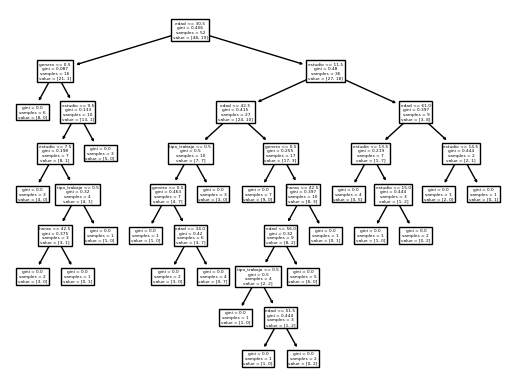

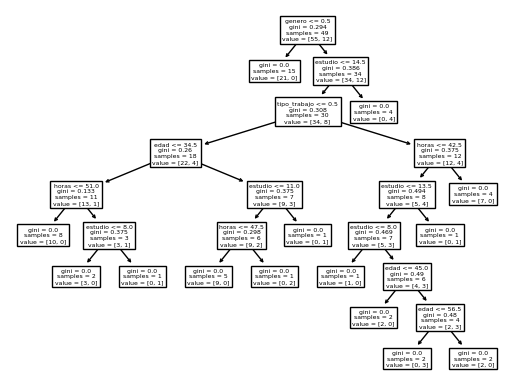

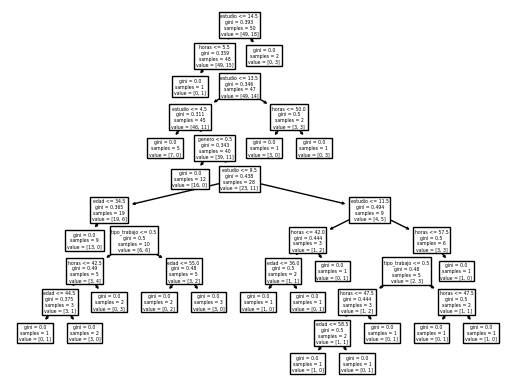

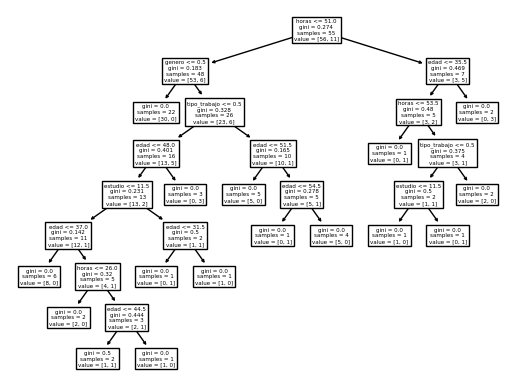

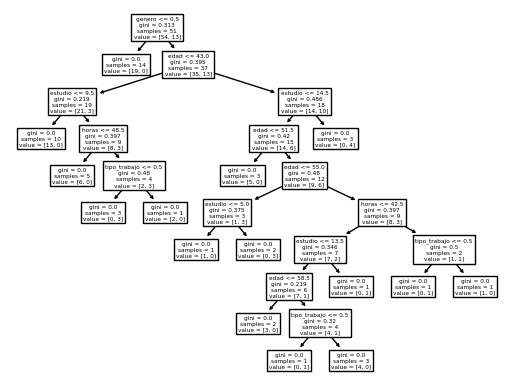

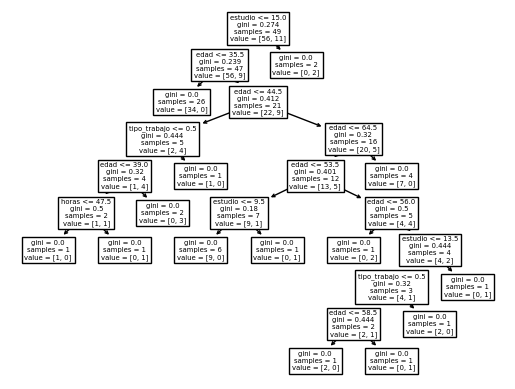

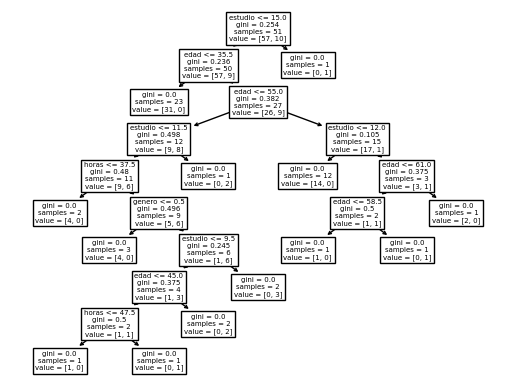

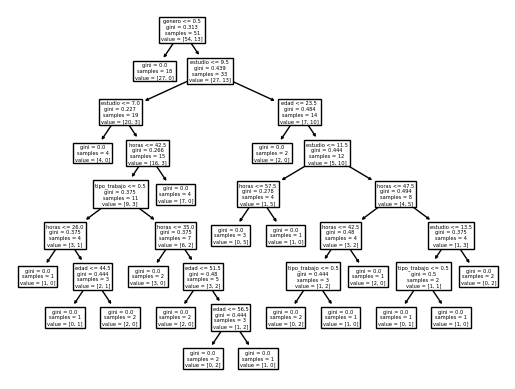

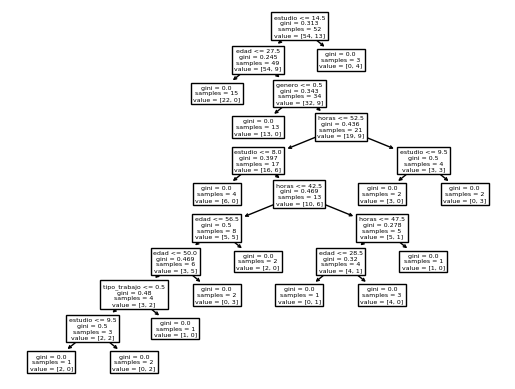

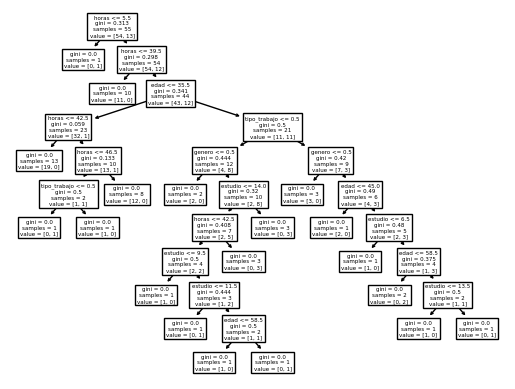

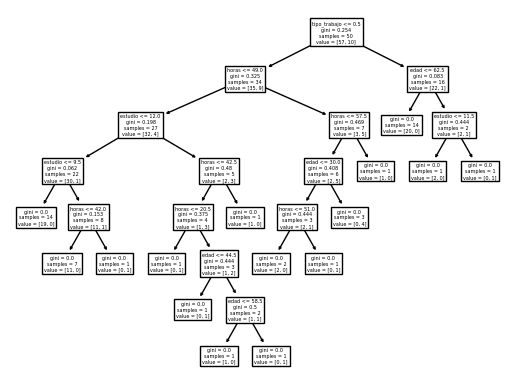

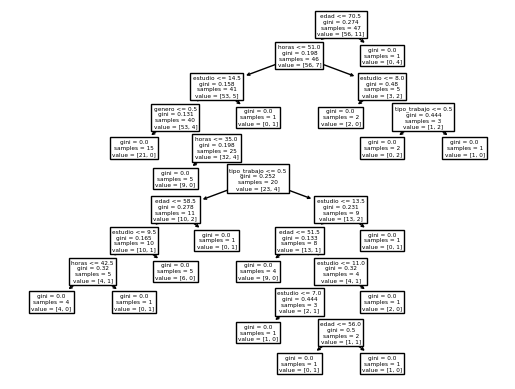

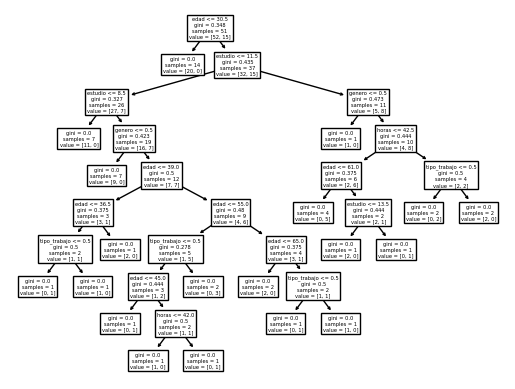

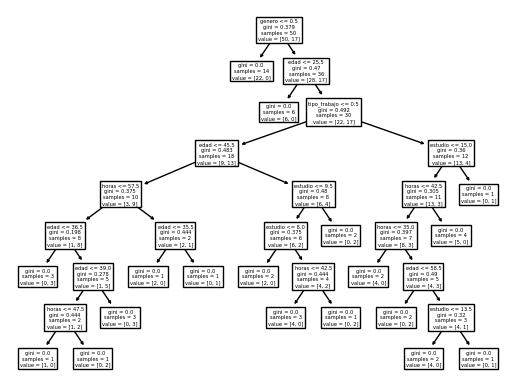

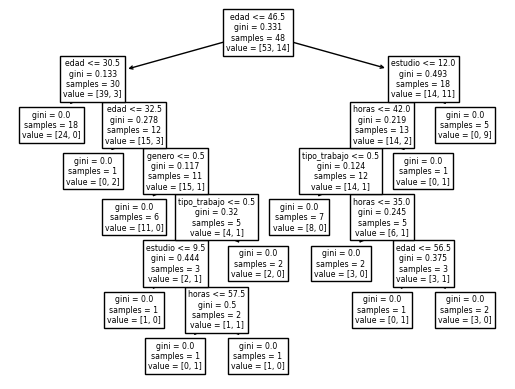

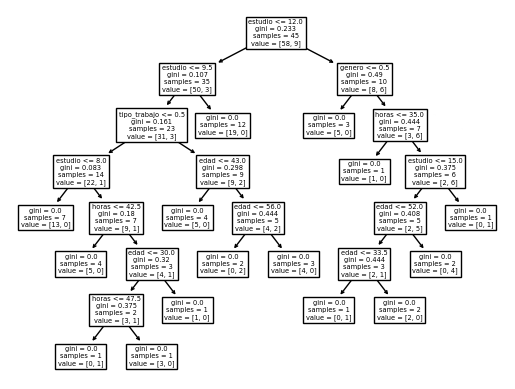

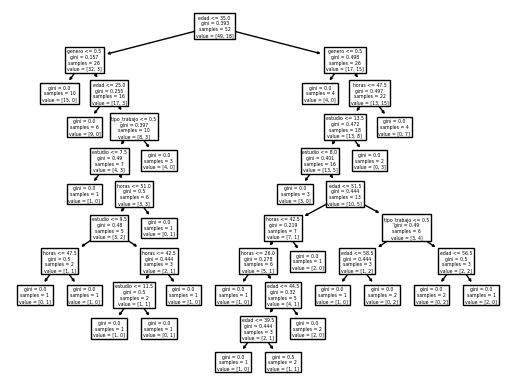

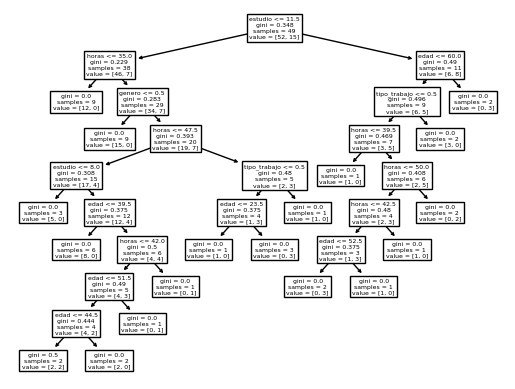

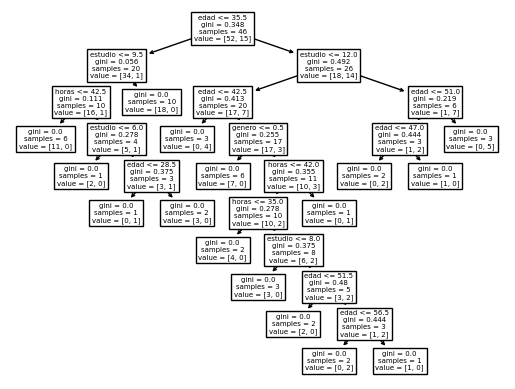

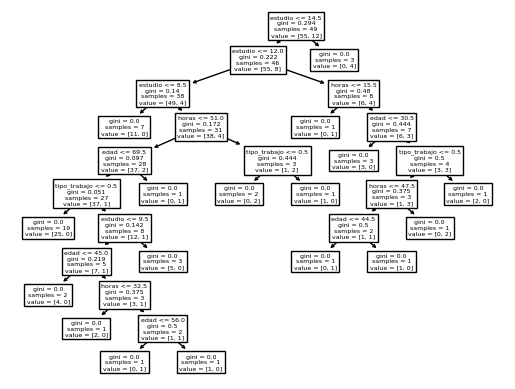

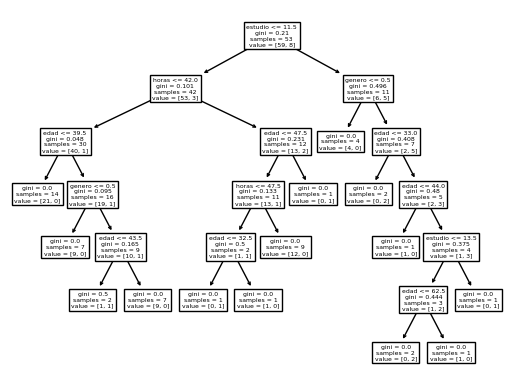

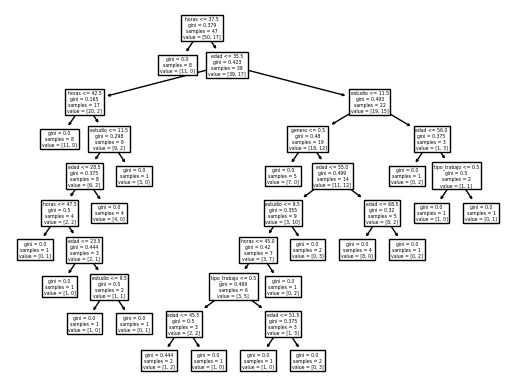

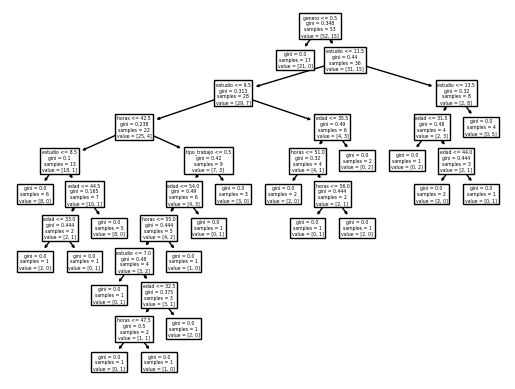

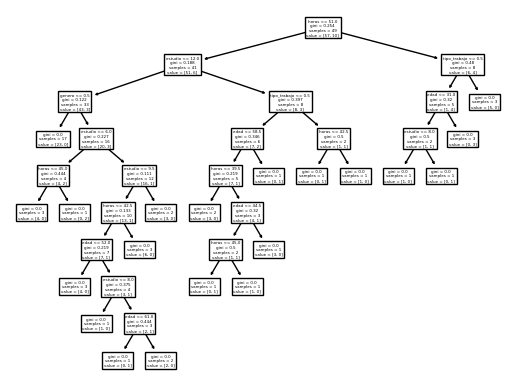

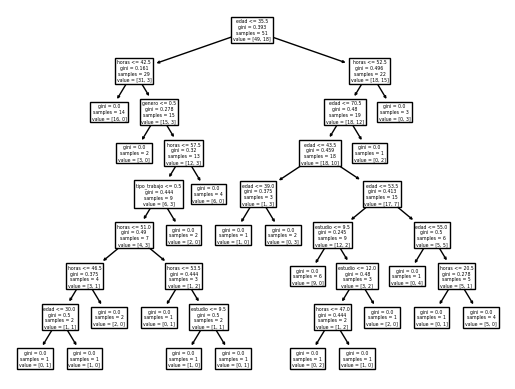

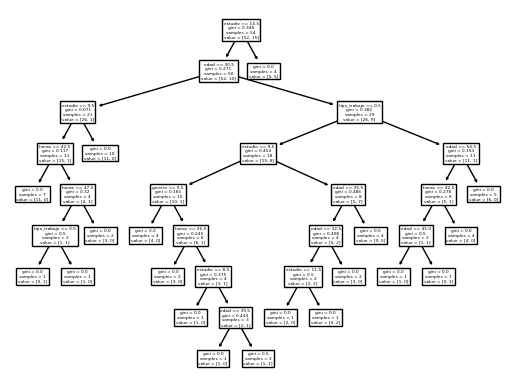

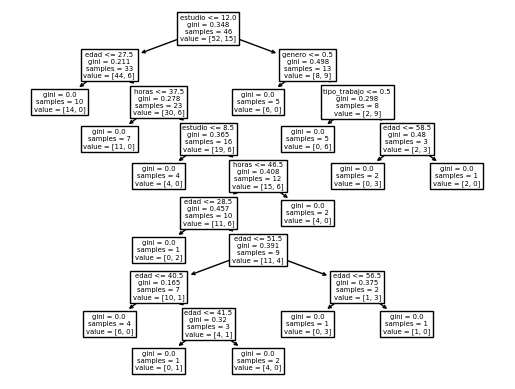

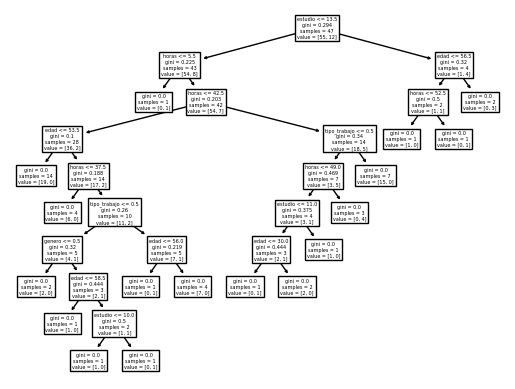

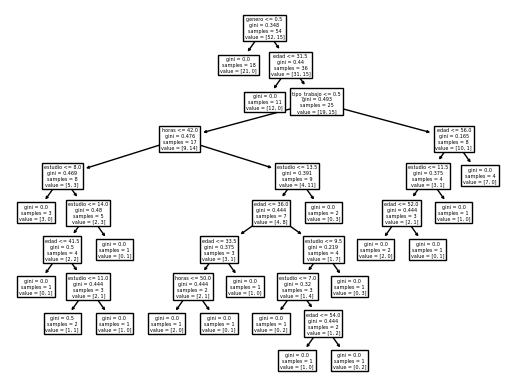

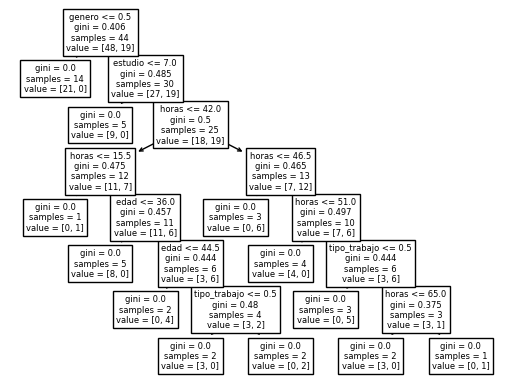

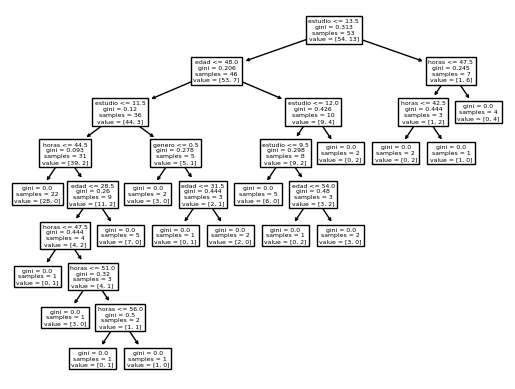

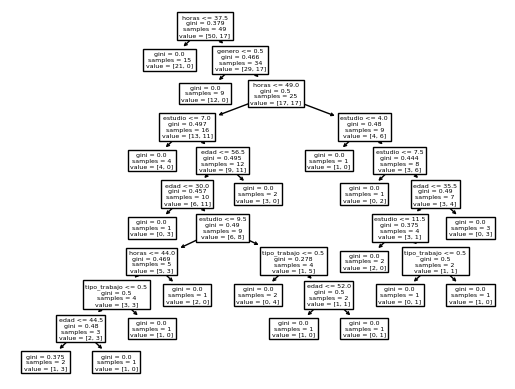

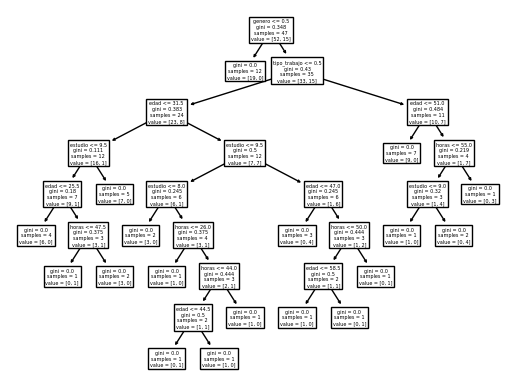

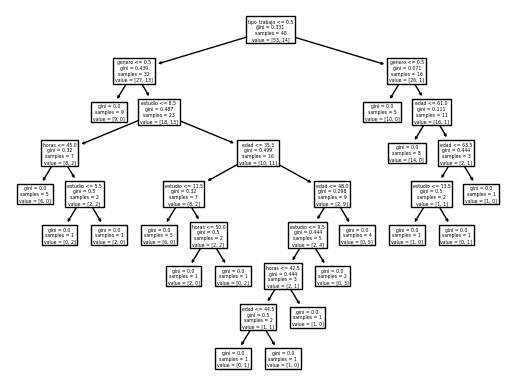

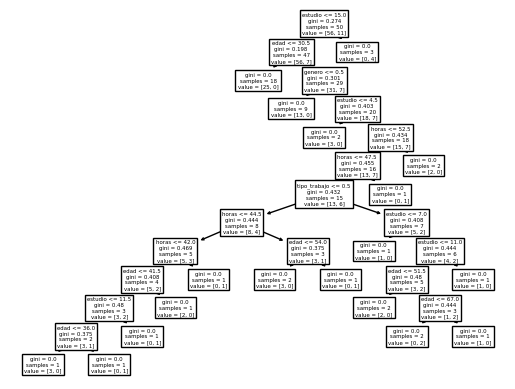

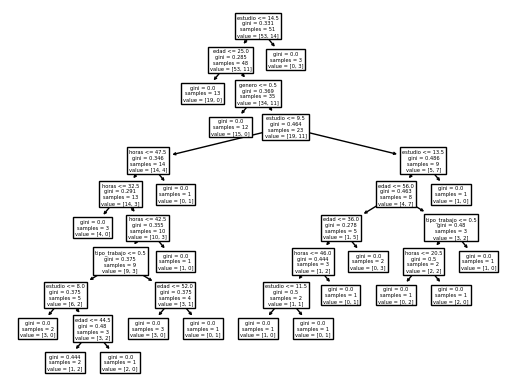

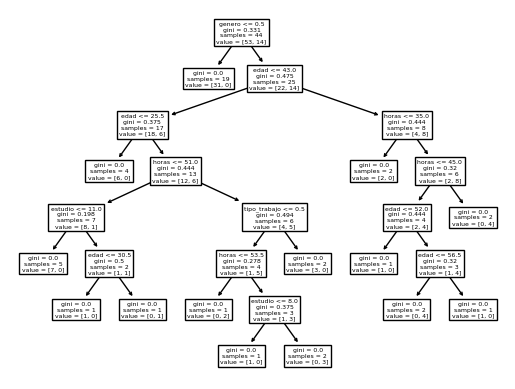

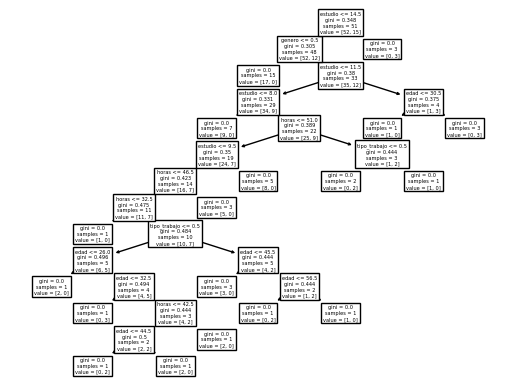

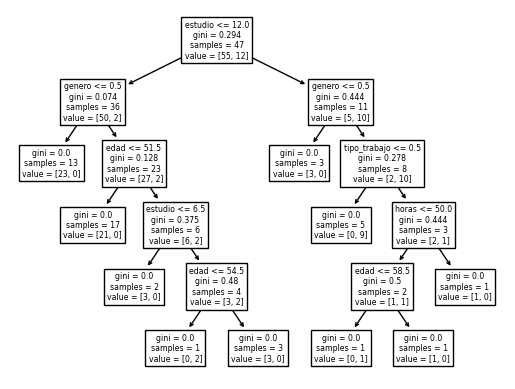

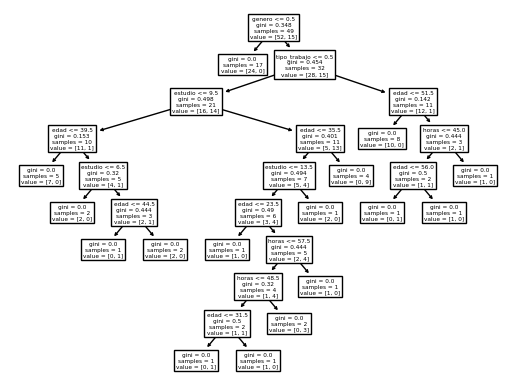

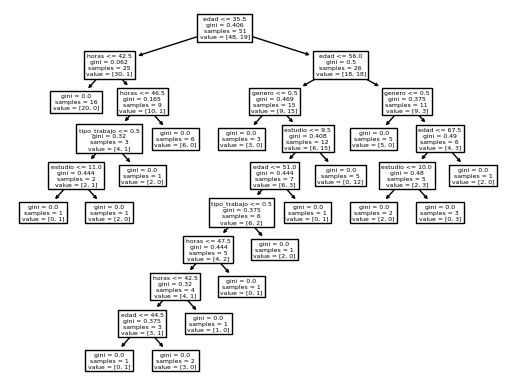

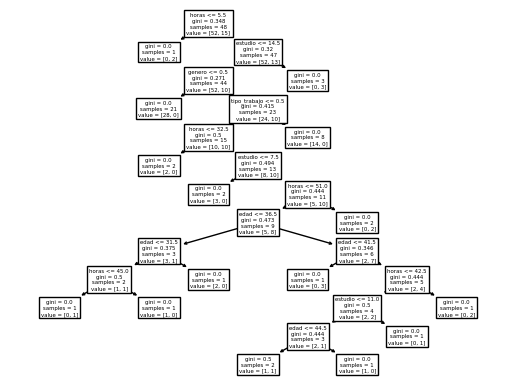

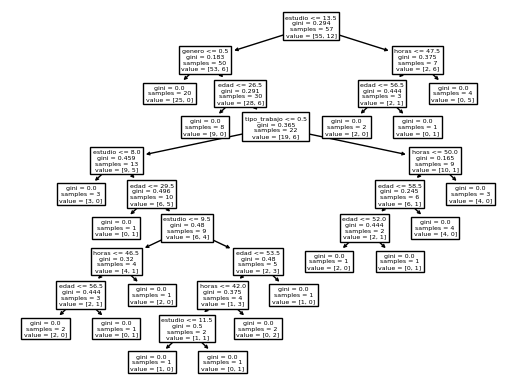

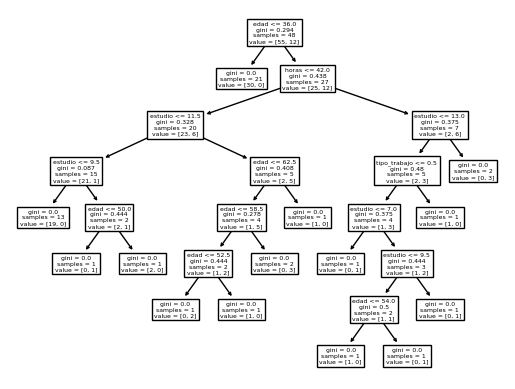

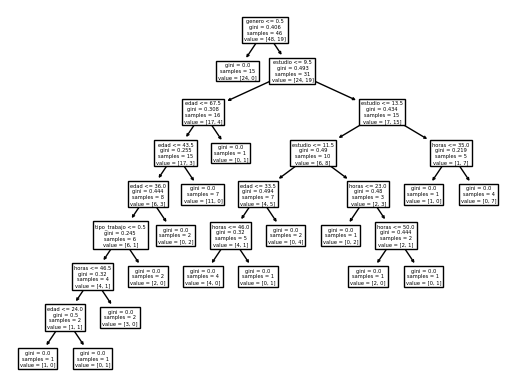

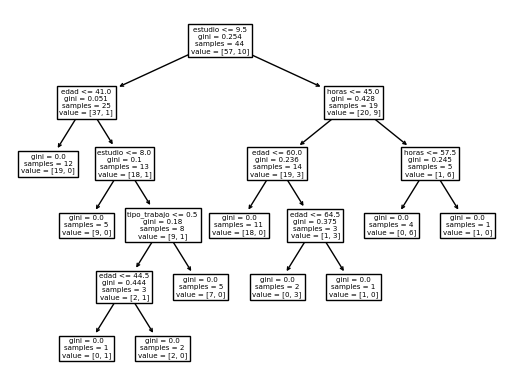

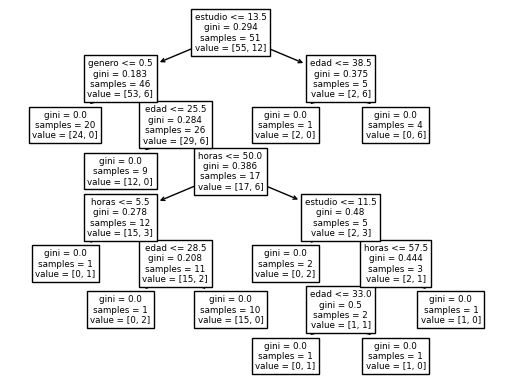

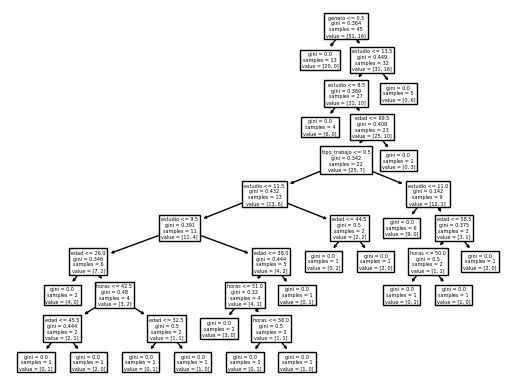

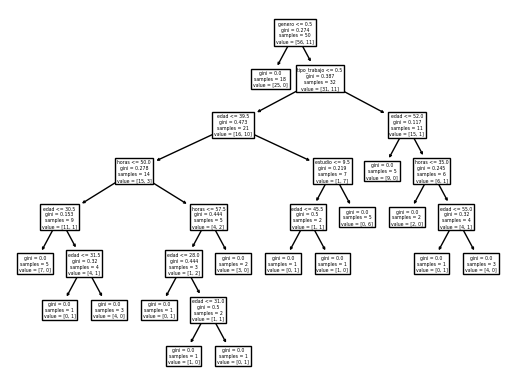

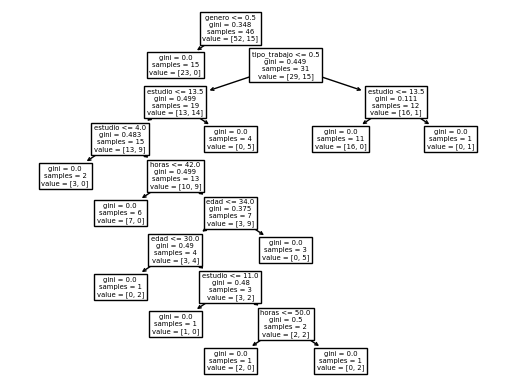

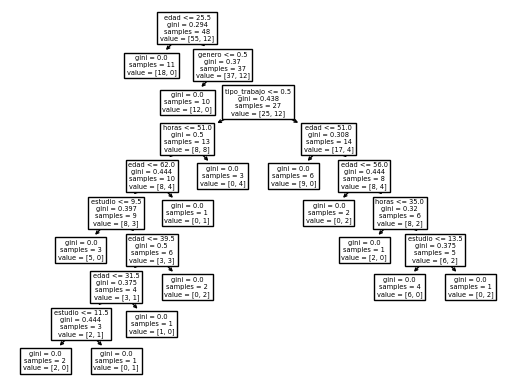

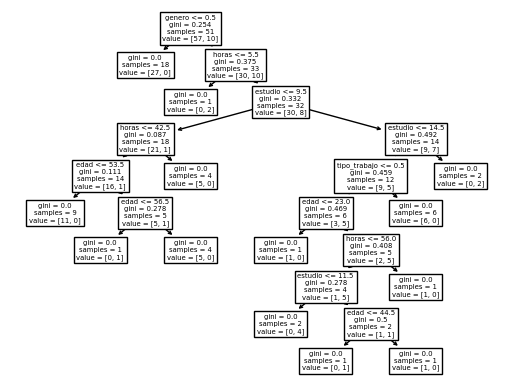

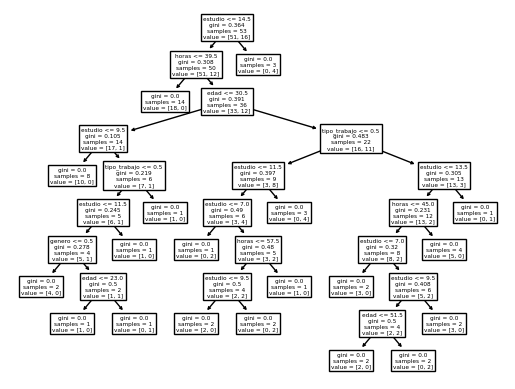

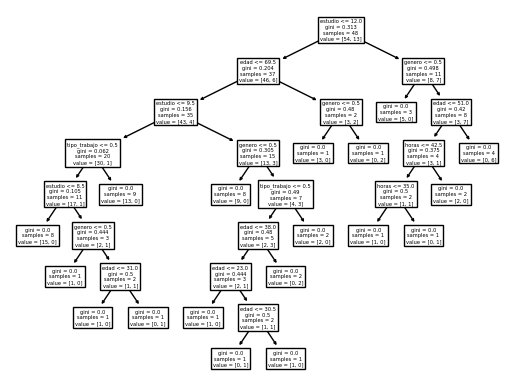

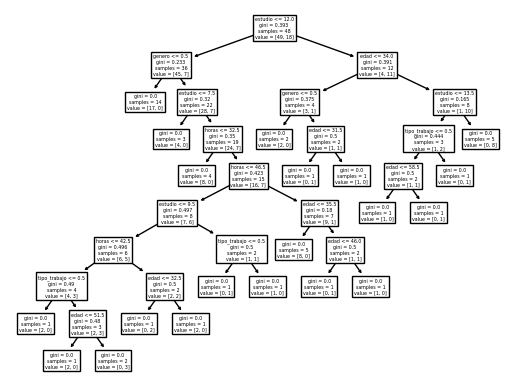

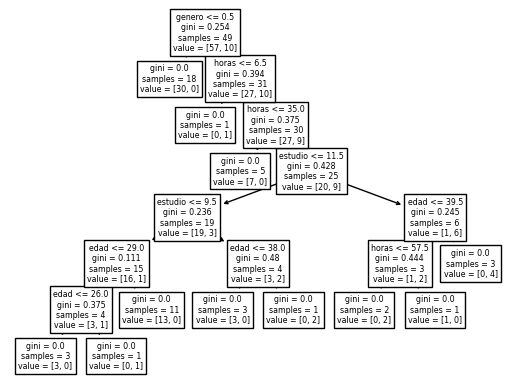

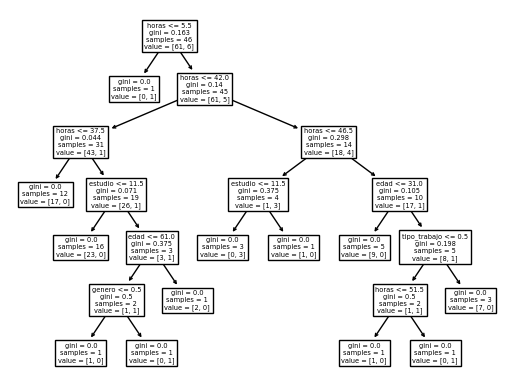

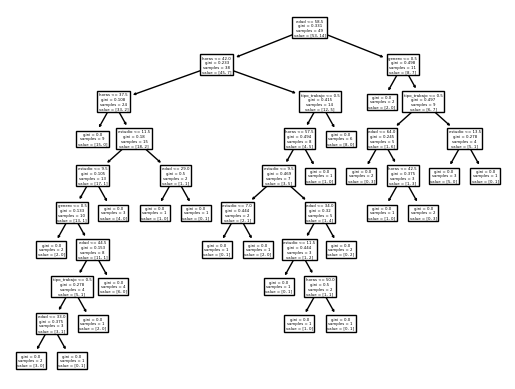

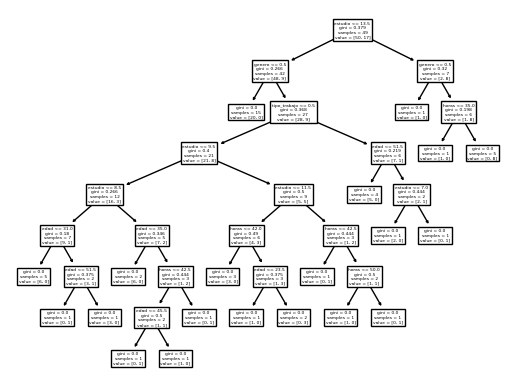

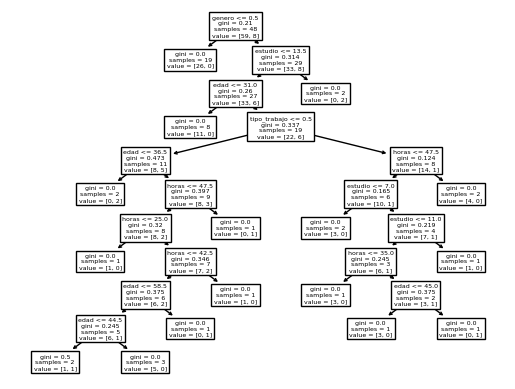

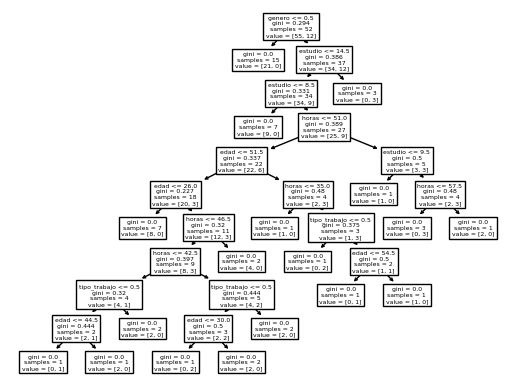

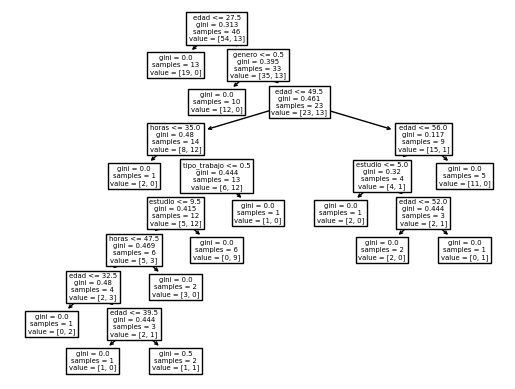

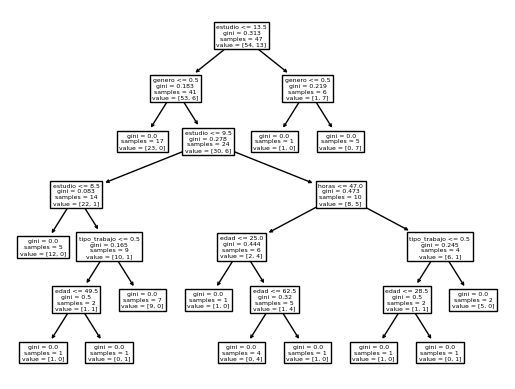

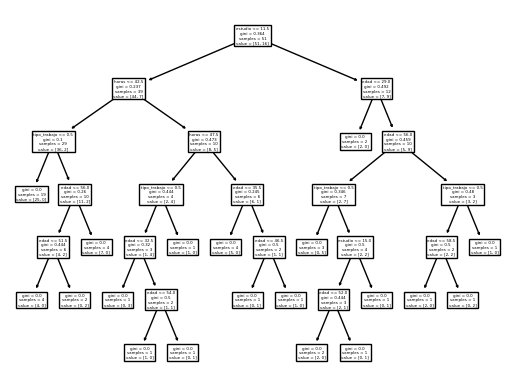

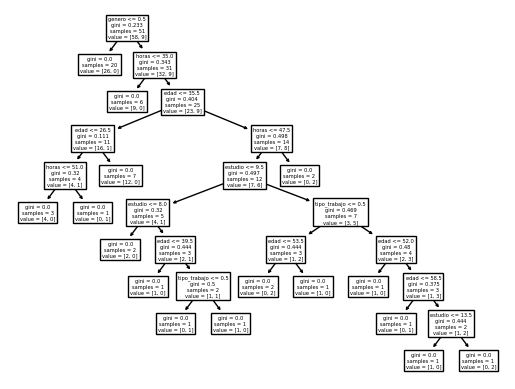

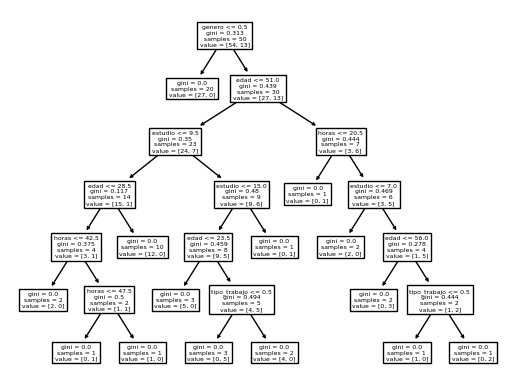

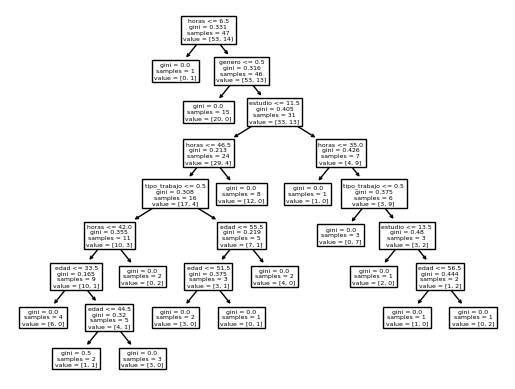

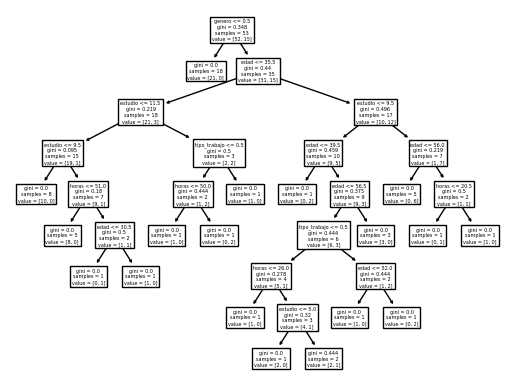

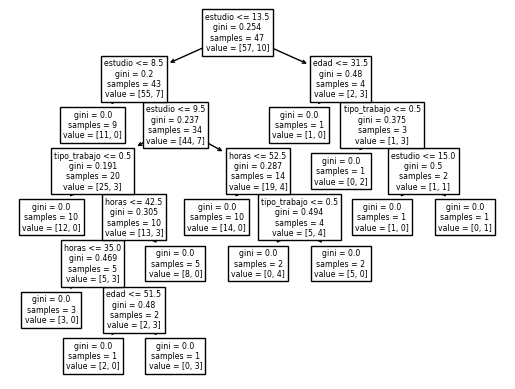

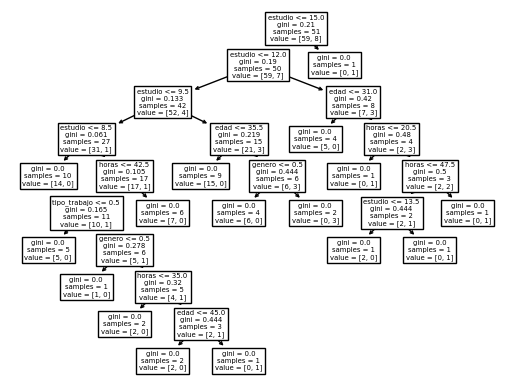

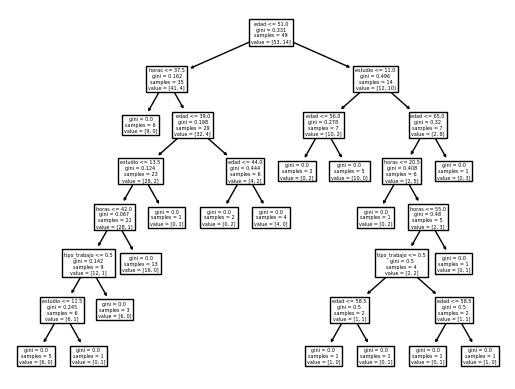

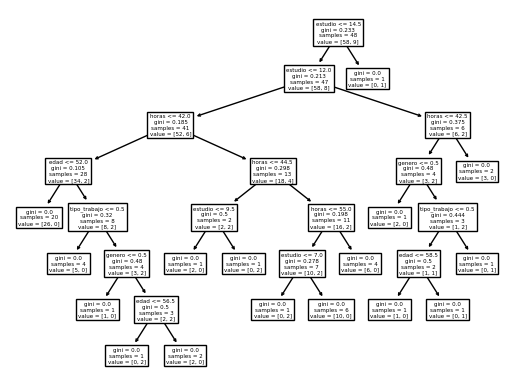

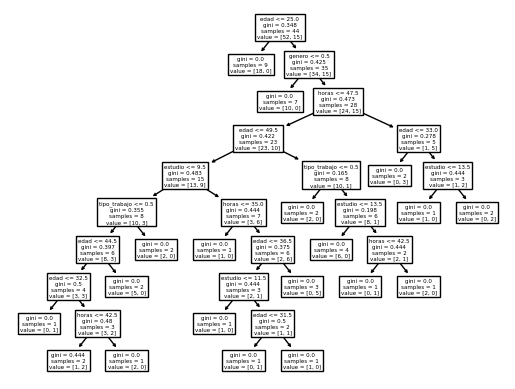

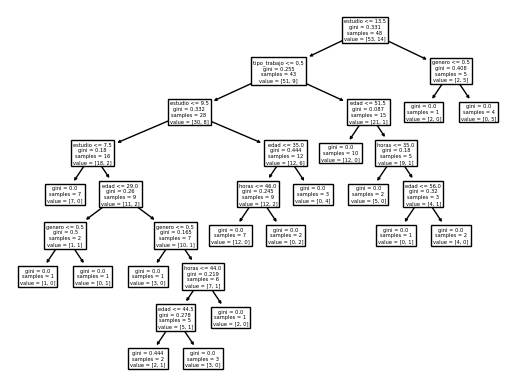

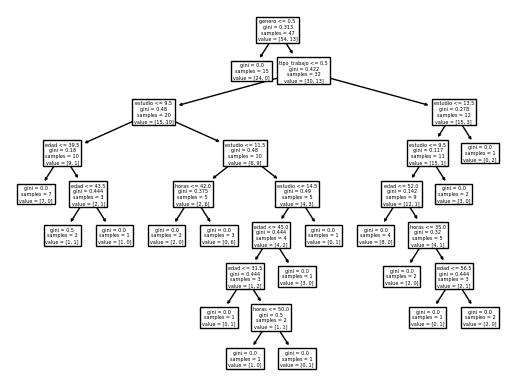

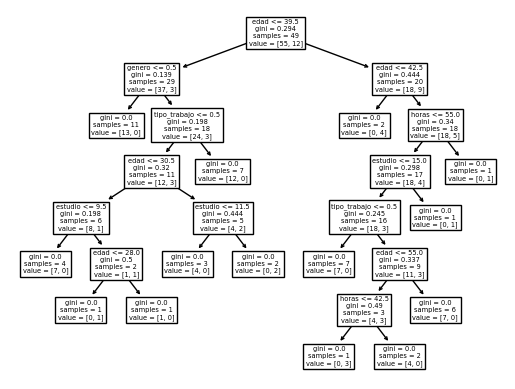

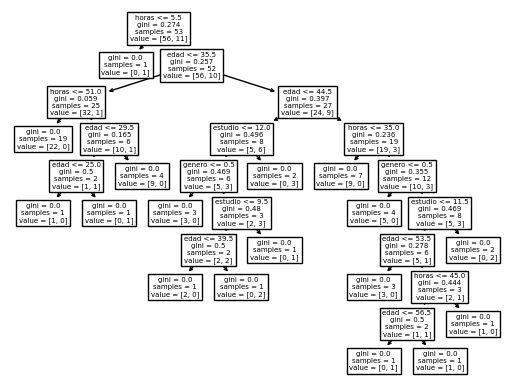

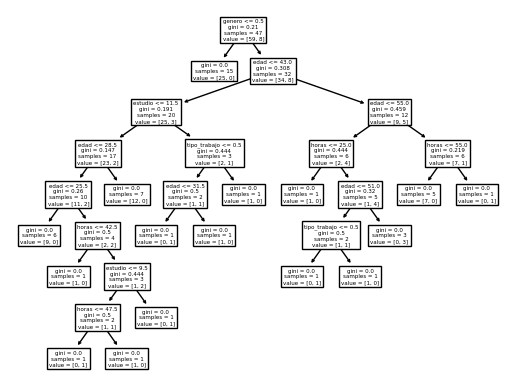

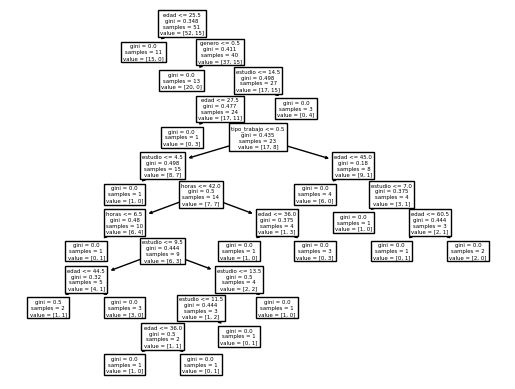

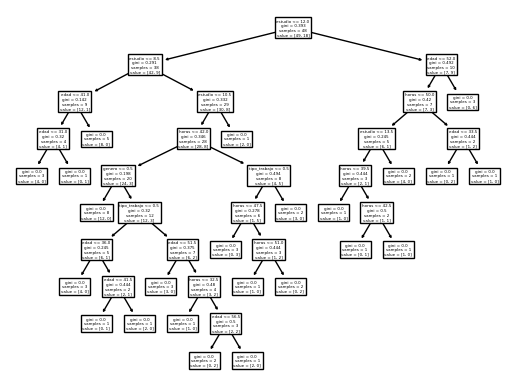

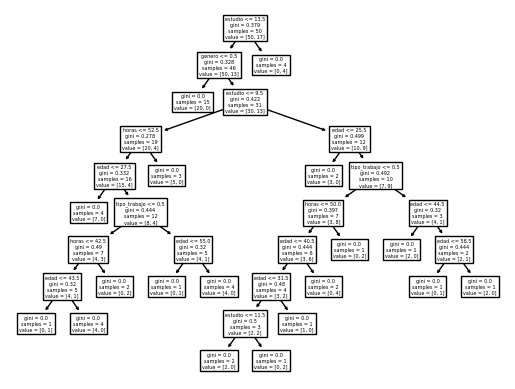

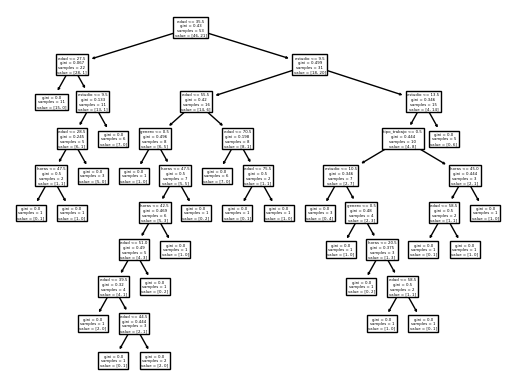

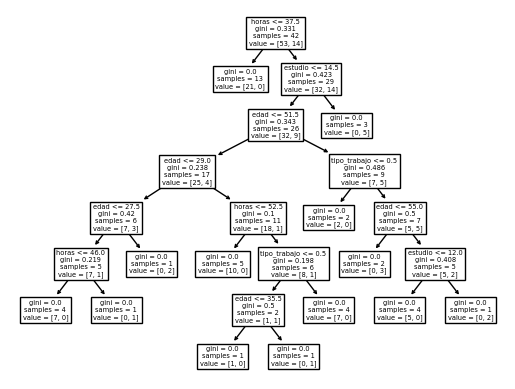

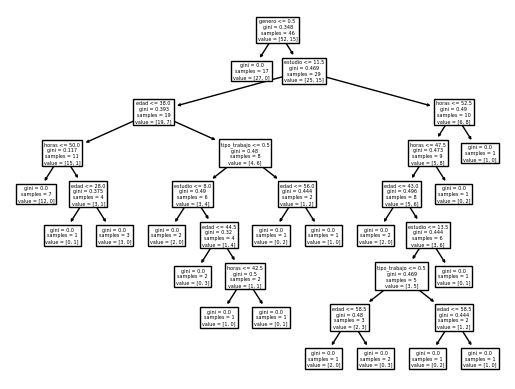

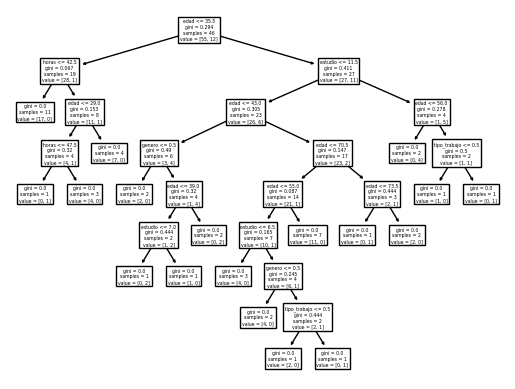

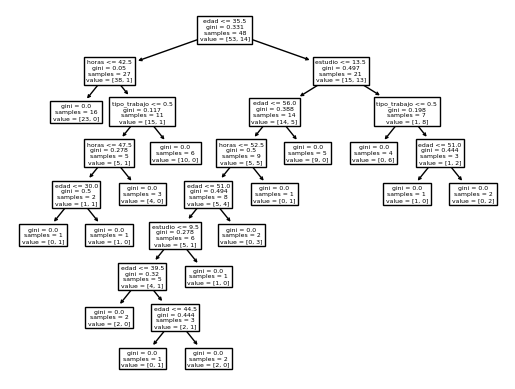

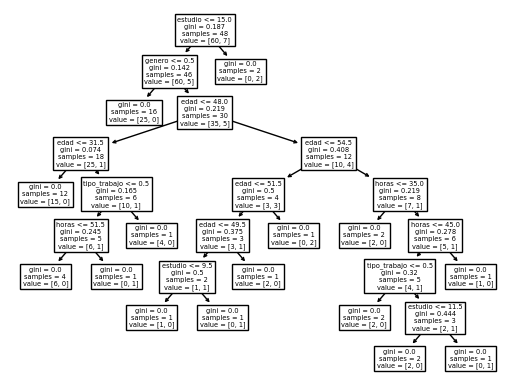

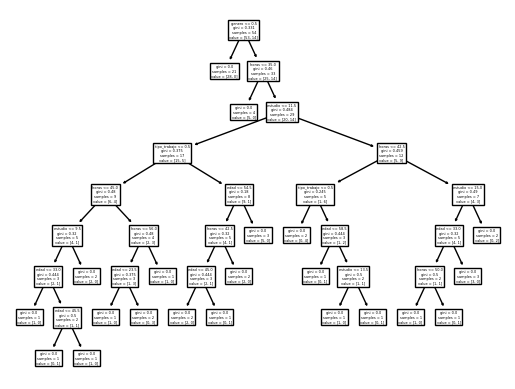

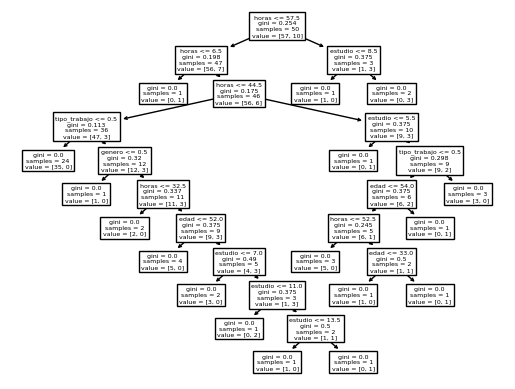

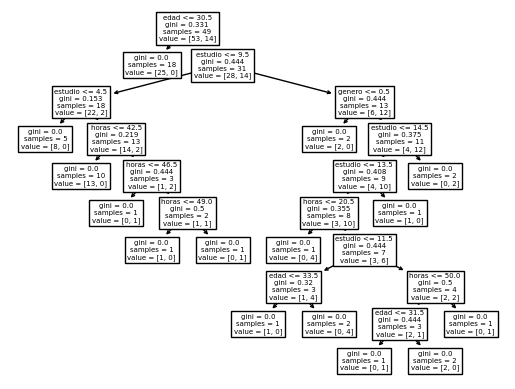

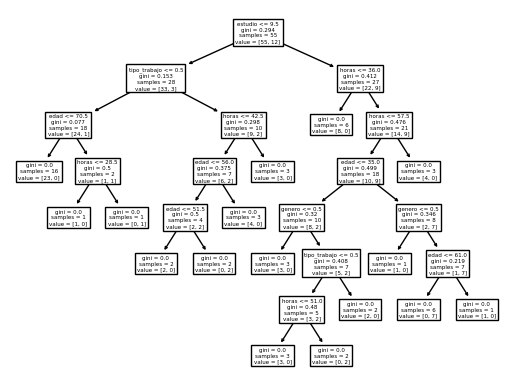

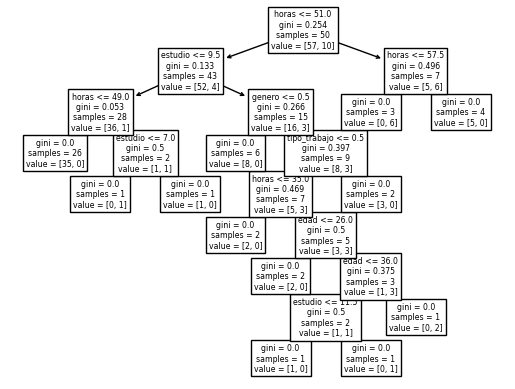

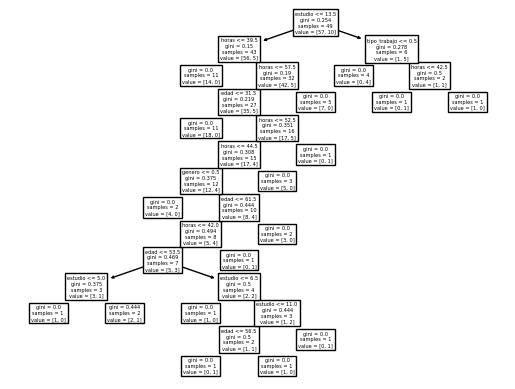

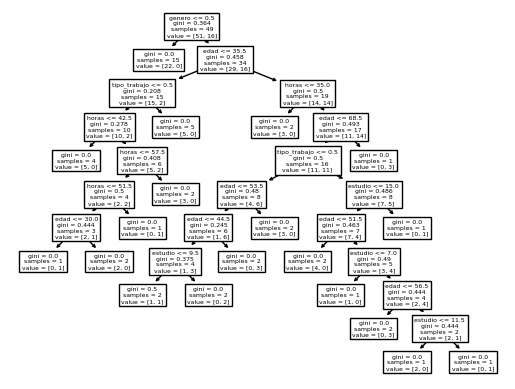

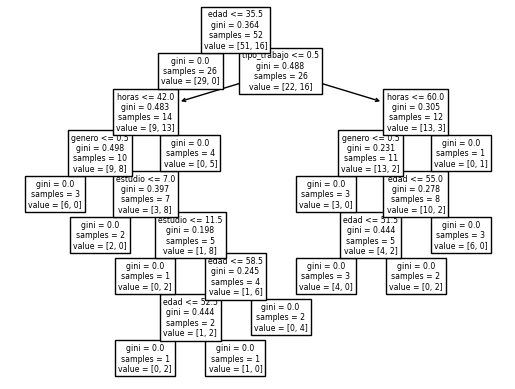

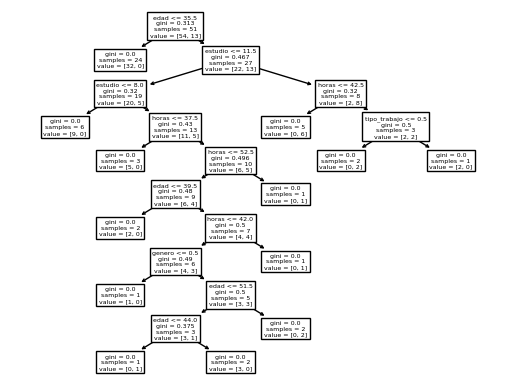

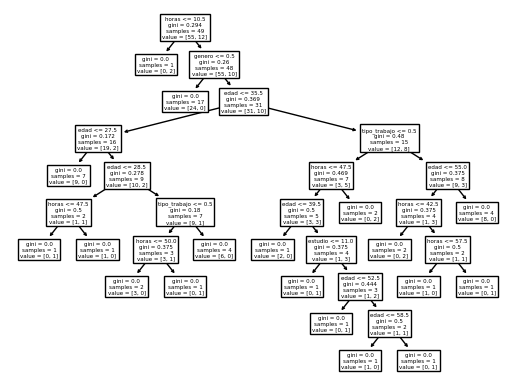

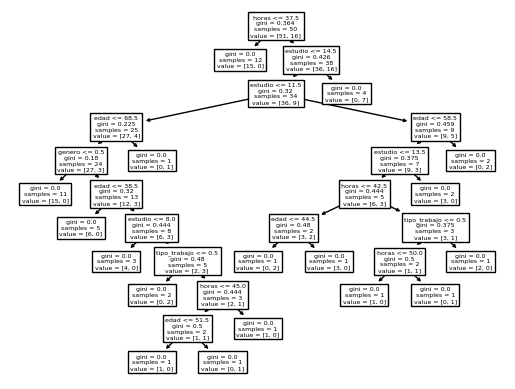

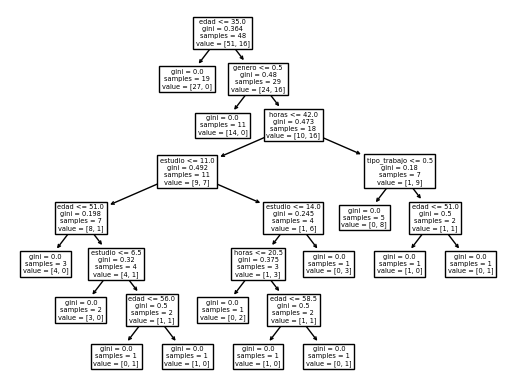

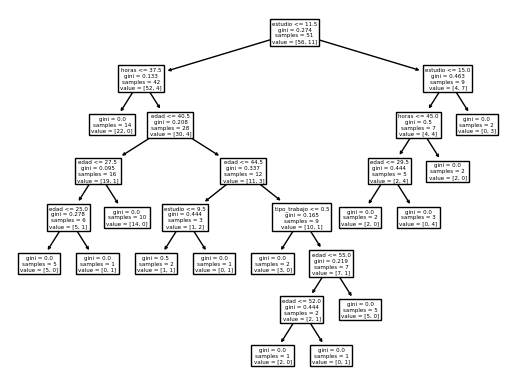

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree

for arbol in bosque.estimators_:
    tree.plot_tree(arbol, feature_names=personas.columns[:-1])
    plt.show()




# Referencia

## Breiman, "Random Forests", Machine Learning, 45(1), 5-32, 2001.